In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# MNIST Digit Recognizer

In [5]:
test = pd.read_csv("test (1).csv")
train = pd.read_csv("train (1).csv")

In [6]:
train_dummies=pd.get_dummies(train)

In [7]:
train1,validate=train_test_split(train_dummies,test_size=0.3,random_state=100)

In [10]:
train_x=train1.drop('label',axis=1)
train_y = train1['label']
validate_x=validate.drop('label',axis=1)
validate_y=validate["label"]

In [12]:
model_rf=RandomForestClassifier(random_state=100,n_estimators=300)
model_rf.fit(train_x,train_y)
validate_pred=model_rf.predict(validate_x)

confusion_matrix(validate_y,validate_pred,labels=[1,2])



Acc=accuracy_score(validate_y,validate_pred)
pred_results_rf=pd.DataFrame({'actual':validate_y,
                           'predicted':validate_pred})

In [24]:
test_pred = model_rf.predict(test)
df_test_pred = pd.DataFrame(test_pred, columns=['Label'])
df_test_pred['ImageId'] = test.index + 1
df_test_pred[['ImageId','Label']].to_csv("Submission.csv",index=False)
df_test_pred.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,9,4
4,3,5


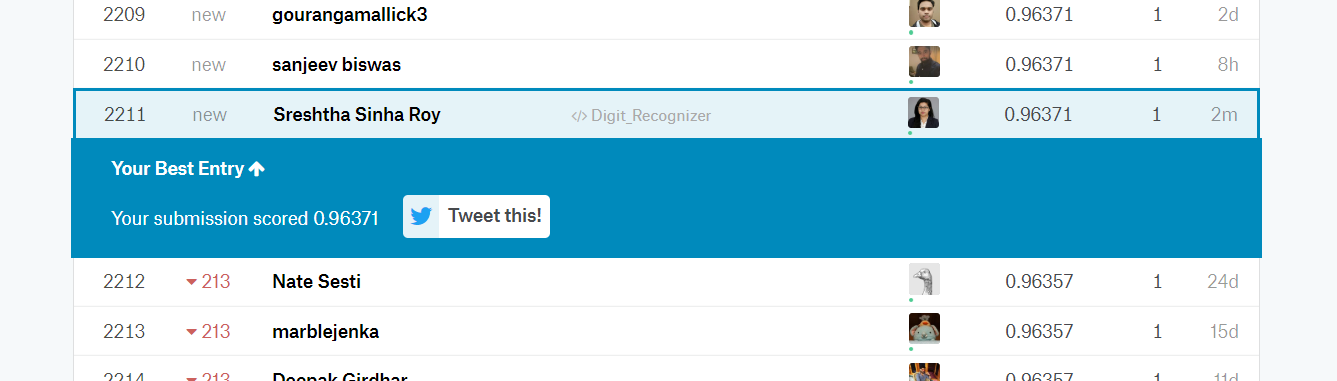

In [54]:
from IPython.display import Image
Image(filename = "Capture.PNG")

###  https://www.kaggle.com/sreshtha/digit-recognizer